# **MILESTONE 1**

___
Nama  		: Rafi Arya Siregar

Batch 		: HCK-028

Obyektif	: Melakukan analisis terhadap listing produk mobil BMW untuk keperluan pengadaan mobil dinas perusahaan menggunakan tools pandas, scipy, matplotlib, seaborn, dan [Tableau.](https://public.tableau.com/app/profile/rafi.siregar/viz/milestone_17478445912520/Dashboard2?publish=yes)
___

# **A. LATAR BELAKANG STUDY CASE**
___
Saya merupakan seorang data analyst yang ditugaskan perusahaan untuk mencari kendaraan operasional perusahaan. Perusahaan menetapkan mobil yang dipakai adalah mobil bekas dengan brand BMW untuk dipakai selama 2 tahun. Pengadaan dilakukan dengan pertimbangan yang strategis yang berfokus pada harga, usia mobil, penggunaan bahan bakar, dan jarak tempuh mobil. Selain memenuhi kebutuhan fungsi, pengadaan mobil juga perlu mempertimbangkan efisiensi penggunaan dari segi ekonomis, termasuk potensi depresiasi harga jual ketika masa pemakaian berakhir.Peningkatan kesadaran penggunaan mobil terhadap efisiensi energi dan keberlanjutan lingkunan di negara Inggris mengakibatkan perusahaan untuk mempertimbangkan pemilihan mobil berdasarkan tipe bahan bakar yang digunakan. Maka dari itu, perusahaan menetapkan pemilihan 5 mobil dinas dengan komposisi:

1. **3 Unit Mobil BMW NON-EV**
2. **1 Unit Mobil BMW Hybrid**
3. **1 Unit Mobil BMW Electric**

Secara garis besar, pemilihan mobil akan ditetapkan pada ketiga kategori tipe mobil diatas.Aalisa juga akan memfokuskan perhitungan per harga dan tipe bahan bakar dengan tujuan meminimalisir depresiasi harga sehingga potensi kerugian nilai aset dapat ditekan serendah mungkin saat kendaraan dijual kembali. Menggunakan *framework* SMART, saya dapat mengelola proyek ini agar berjalan dengan terarah. Berikut penjabaran SMART. 

### **SMART FRAMEWORK**
___

**PROBLEM STATEMENT**:
Pemilihan 5 unit mobil dinas bermerek BMW dengan kondisi bekas yang memiliki komposisi 3 unit NON-EV, 1 unit Hybrid, dan 1 unit Electric Vehicle yang memiliki performa optimal selama pemaikaian 3 tahun agar terhindar dari depresiasi harga saat akan dijual setelah masa pemakaian brakhir.

- **Specific**: Menganalisis produk BMW paling optimal di negara Inggris dengan melihat harga, performa, dan jenis bahan bakar sebagai rekomendasi pengadaan kendaraan operasional perusahaan.
- **Measure**: Komposisi mobil BMW terdiri dari 3 unit NON-EV, 1 unit Hybrid, dan 1 unit Electric Vehicle dengan mempertimbangkan harga, kualitas unit agar terhindar dari depresiasi harga yang berlebih.
- **Achievable**: Melakukan analisa berdasarkan dataset listing BMW di negara Inggris. Analisa dilakukan dengan menggunakan python dan tableau untuk mengolah, mengekstraksi, dan menampilkan data berdasarkan insight yang diperoleh.
- **Relevant**: Menganalisa listing produk BMW bekas di negara Inggris dari segi harga, tahun keluaran, tipe bahan bakar, harga pajak, bahan bakar yang dibutuhkan pada jarak tertentu, dan jarak tempuh mobil.
- **Time Bound**: Menganalisa dan mengevaluasi data selama satu minggu untuk mengukur kesesuaian metrik diatas agar mendapatkan 5 mobil bekas paling optimal.

### **PENJABARAN MASALAH**
___
Berdasarkan *problem statment* di atas, terdapat enam poin permasalahan yang saya angkat:

1. Rata-rata harga per tipe bahan bakar.
2. Rata-rata mileage per tipe bahan bakar.
3. Rata-rata mpg per tipe bahan bakar.
4. Kategori harga murah-sedang-mahal tipe mobil dan keluaran tahun. 
5. Keuntungan minimum dan maximum pada top 5 model dan tahun per tipe mobil dan keluaran tahun.
6. Hubungan antara harga per tipe bahan bakar dengan mileage per tipe bahan bakar.


## **B. DATA EXPLORATION & DATA CLEANING**
___
Saya menggunakan data listing produk BMW yang diambil dari situs [kaggle.com](kaggle.com) untuk menetapkan 5 unit yang akan dibeli. Dataset dapat diakses [di sini.](https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes/data?select=bmw.csv)

In [36]:
# Melakukan import library dan package yang akan digunakan untuk keperluan pengolahan data pada dataframe, perhitungan statistika, dan visualisasi data.
import pandas as pd # data manipulasi
import numpy as np # data manipulasi
from scipy import stats # statistika
import matplotlib.pyplot as plt # visualisasi data
import seaborn as sns # visualisasi data

In [37]:
# Membaca file csv yang diambil pada situs kaggle diatas.
# Menggunakan parameter skipinitialspace untuk menghapus spasi setelah koma.
dfawal = pd.read_csv('bmw.csv', skipinitialspace = True).reset_index(drop=True)
dfawal.columns = dfawal.columns.str.strip()

In [38]:
# Membaca baris dan kolom yang ada pada dataframe
barkol = dfawal.shape
print(f'Terdapat {barkol[0]} baris dan {barkol[1]} kolom pada dataframe')

Terdapat 10781 baris dan 9 kolom pada dataframe


In [39]:
# Informasi keseluruhan data pada dataframe
dfawal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [40]:
# Jumlah nilai null pada dataframe
sumnull =dfawal.isna().sum()
display(sumnull)

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [41]:
# Jumlah nilai duplicated pada dataframe
sumdup  =dfawal.duplicated().sum()
display(sumdup)

np.int64(117)

In [42]:
# Melihat nilai 0 atau tidak terisi pada setiap kolom
nomodel = dfawal[dfawal['model'].isna()]
noyear = dfawal[dfawal['year'] == 0]
noprice = dfawal[dfawal['price'] == '']
notrans = dfawal[dfawal['transmission'].isna()]
nomil = dfawal[dfawal['mileage'] == 0]
noft = dfawal[dfawal['fuelType'].isna()]
notax = dfawal[dfawal['tax'] == 0]
nompg = dfawal[dfawal['mpg'] == 0]
noeng = dfawal[dfawal['engineSize'] == 0]

display(nomodel)
display(noyear)
display(noprice)
display(notrans)
display(nomil)
display(noft)
display(notax)
display(nompg)
display(noeng)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
23,1 Series,2016,9400,Manual,44498,Diesel,0,83.1,1.5
32,i3,2016,17100,Automatic,25269,Other,0,470.8,0.6
35,2 Series,2017,13000,Automatic,61818,Other,0,141.2,1.5
48,1 Series,2016,9200,Manual,48858,Diesel,0,83.1,1.5
59,1 Series,2015,11100,Manual,11524,Diesel,0,83.1,1.5
...,...,...,...,...,...,...,...,...,...
10763,1 Series,2016,8500,Manual,68810,Diesel,0,83.1,1.5
10764,1 Series,2016,9100,Manual,54596,Diesel,0,83.1,1.5
10765,3 Series,2016,17700,Automatic,20670,Other,0,134.5,2.0
10766,1 Series,2016,8700,Manual,54987,Diesel,0,83.1,1.5


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
621,i3,2017,19998,Automatic,41949,Hybrid,140,470.8,0.0
778,i3,2017,19998,Automatic,41146,Hybrid,0,470.8,0.0
780,i3,2017,21898,Automatic,10839,Hybrid,0,470.8,0.0
1866,i3,2017,19980,Automatic,26965,Hybrid,140,470.8,0.0
2352,i3,2016,19490,Automatic,8421,Hybrid,0,470.8,0.0
3277,i3,2016,16482,Automatic,43695,Hybrid,0,470.8,0.0
3628,i3,2015,14285,Automatic,65800,Hybrid,0,470.8,0.0
3913,i3,2017,18500,Automatic,36429,Hybrid,0,470.8,0.0
4100,i3,2017,19495,Automatic,17338,Hybrid,135,470.8,0.0
4109,i3,2015,17481,Automatic,9886,Hybrid,0,470.8,0.0


Terdapat nilai 0 pada kolom tax dan engine size. Kedua kolom tersebut merupakan informasi harga pajak serta spesifikasi cc mobil dalam satuan liter. 

In [43]:
# Menghapus nilai Other pada kolom model
df = dfawal[~dfawal['fuelType'].str.contains('Other', na=False)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10745 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10745 non-null  object 
 1   year          10745 non-null  int64  
 2   price         10745 non-null  int64  
 3   transmission  10745 non-null  object 
 4   mileage       10745 non-null  int64  
 5   fuelType      10745 non-null  object 
 6   tax           10745 non-null  int64  
 7   mpg           10745 non-null  float64
 8   engineSize    10745 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 839.5+ KB


Nilai Other merupakan kategori yang tidak teridentifikasi pada tipe bahan bakar mobil. Maka dari itu agar memfokuskan analisa terhadap jenis mobil NON-EV, Electric, dan Hybrid, saya menghapus seluruh baris yang memiliki nilai Other. 

**Kesimpulan sementara:**

- Tidak terdapat nilai null pada dataset. 
- Nilai duplicated merujuk pada value categorical seperti jenis model dan tahun keluaran mobil yang sama.
- Pada kolom ``tax`` dan ``engineSize`` terdapat nilai 0 dengan tipe integer. Asumsi saya data tax memiliki nilai 0 karena pajak yang mati. Perkiraan lain adalah data yang salah pada saat registrasi dan jenis kendaraan yang bebas pajak yang dimiliki oleh instansi pemerintah.
- Menghapus value Other pada kategori bahan bakar sebanyak 36 baris. Maka saat ini total baris ada 10745.

In [44]:
# df = df.dropna(subset=df.columns[3:8], how='any')
# df.info()

df['model'].unique()

array(['5 Series', '6 Series', '1 Series', '7 Series', '2 Series',
       '4 Series', 'X3', '3 Series', 'X5', 'X4', 'X1', 'M4', 'X2', 'X6',
       '8 Series', 'Z4', 'X7', 'M5', 'i8', 'M2', 'i3', 'M3', 'M6', 'Z3'],
      dtype=object)

___

## **C. DATA ANALYSYS**
___

Analisa data berfokus dalam menjawab enam poin penjabaran masalah yang telah di set pada bagian latar belakang.

### **1. Persebaran data mobil per tahun**
___
Mengidentifikasi data mobil per tahun

### **1. Rata-rata harga per tipe bahan bakar**
___
Mengidentifikasi rata-rata harga mobil berdasarkan tipe bahan bakar untuk mengidentifikasi mobil dengan tipe bahan bakar apa yang paling menguntungkan jika dilakukan pembelian.

In [45]:
# Menggunakan fungsi groupby pada kolom fuelType dengan mengagregasi rata-rata harga.
# Mengurutkan nilai dari yang terkecil ke terbesar.
# Melakukan indexing nilai dengan reset_index
# Menyimpan group by pada objek avg_price  

avg_price = df.groupby('fuelType')['price'].mean().sort_values().reset_index(drop=False)
avg_price

,fuelType,price
0,Electric,18466.000000
1,Diesel,21779.262986
2,Petrol,24360.271583
3,Hybrid,27169.714765


Menampilkan visualisasi tabel rata-rata ``harga`` per ``fuelType``.

C:\Users\rafiu\AppData\Local\Temp\ipykernel_25272\1904023472.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price.fuelType, y=avg_price.price, palette='viridis')


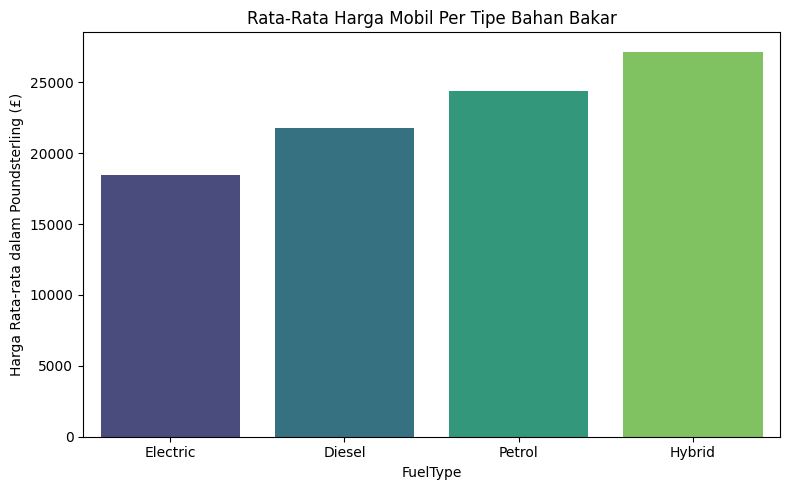

In [46]:
# Menggunakan seaborn dan matplotlib untuk keperluan visualisasi data
# Menginisasi figure dan ukurannya agar dapat memunculkan bar
# Menggunakan barplot untuk memunculkan persebaran data harga yang termurah sampai termahal.
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price.fuelType, y=avg_price.price, palette='viridis')
plt.title('Rata-Rata Harga Mobil Per Tipe Bahan Bakar')
plt.ylabel('Harga Rata-rata dalam Poundsterling (£)')
plt.xlabel('FuelType')
plt.tight_layout()
plt.show()

**Analisa sementara:**

- Rata-rata harga mobil **listrik** sebesar **£18.466,-**
- Rata-rata harga mobil **diesel** sebesar **£21.779,26**
- Rata-rata harga mobil **bensin** sebesar **£24.360,27**
- Rata-rata harga mobil **hybrid** sebesar **£27.169,71**
- Mobil dengan rata-rata paling **murah** adalah **mobil listrik**.
- Mobil dengan rata-rata paling **mahal** adalah **mobil hybrid**.
- Melihat persebaran data saat ini, akan lebih menguntungkan jika membeli mobil 3 mobil jenis diesel daripada mobil jenis bensin.
- Maka dari itu, saya perlu melakukan analisa lebih lanjut terhadap pada rata-rata mobil dengan nilai jarak tempuh untuk mengidentfikasi mobil yang tidak terlalu sering dipakai.

## **3. Rata-rata jarak tempuh mobil per tipe bahan bakar**
___

Mengidentifikasi rata-rata jarak tempuh mobil berdasarkan tipe bahan bakar untuk mengetahui kecenderungan mobil yang jarang dipakai agar menguntungkan jika dilakukan pembelian dari segi performa mobil dan turnover unit nantinya.

In [47]:
# Menggunakan fungsi groupby pada kolom fuelType dengan mengagregasi rata-rata jarak tempuh.
# Mengurutkan nilai dari yang terkecil ke terbesar.
# Melakukan indexing nilai dengan reset_index
# Menyimpan group by pada objek avg_mileage  

avg_mileage = df.groupby('fuelType')['mileage'].mean().sort_values().reset_index(drop=False)
avg_mileage

,fuelType,mileage
0,Petrol,16524.097454
1,Electric,19925.333333
2,Hybrid,23400.530201
3,Diesel,29852.804042


Menampilkan visualisasi tabel rata-rata ``mileage`` per ``fuelType``.

C:\Users\rafiu\AppData\Local\Temp\ipykernel_25272\956629529.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_mileage.fuelType, y=avg_mileage.mileage, palette='viridis')


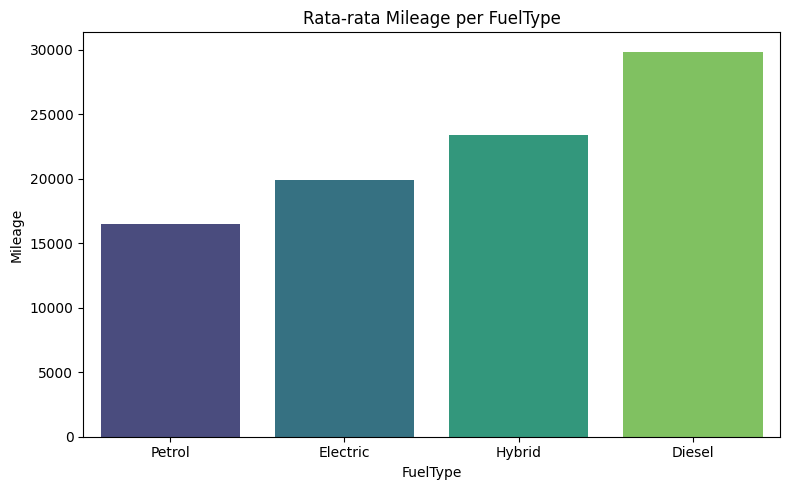

In [48]:
# Menggunakan seaborn dan matplotlib untuk keperluan visualisasi data
# Menginisasi figure dan ukurannya agar dapat memunculkan bar
# Menggunakan barplot untuk memunculkan persebaran data harga yang termurah sampai termahal.

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_mileage.fuelType, y=avg_mileage.mileage, palette='viridis')
plt.title('Rata-rata Mileage per FuelType')
plt.ylabel('Mileage')
plt.xlabel('FuelType')
plt.tight_layout()
plt.show()

**Analisa sementara:**

- Rata-rata jarak tempuh mobil **listrik** sebesar **19925.33 Miles**
- Rata-rata jarak tempuh mobil **diesel** sebesar **29852.80 Miles**
- Rata-rata jarak tempuh mobil **bensin** sebesar **16524.097 Miles**
- Rata-rata jarak tempuh mobil **hybrid** sebesar **23400.530 Miles**
- Mobil dengan rata-rata jarak tempuh paling **dekat** adalah **mobil bensin**.
- Mobil dengan rata-rata jarak tempuh paling **jauh** adalah **mobil diesel**.
- Jika membandingkan persebaran data rata-rata harga, muncul pertimbangan baru dimana akan lebih menguntungkan jika membeli mobil bensin berdasarkan jarak tempuh. 
- Maka dari itu, saya perlu melakukan analisa lebih lanjut terhadap pada rata-rata mobil dengan data rata-rata miles per galon untuk mengidentfikasi mobil dari tingkat keborosan bahan bakarnya.

## **4. Rata-rata Miles Per Galon mobil per tipe bahan bakar**
___
Mengidentifikasi rata-rata data Miles per Galon untuk mengukur kebutuhan bahan bakar mobil berdasarkan tipe bahan bakar untuk mengidentifikasi tingkat keborosan tipe bahan bakar.

In [49]:
# Menggunakan fungsi groupby pada kolom fuelType dengan mengagregasi rata-rata miles per galon.
# Mengurutkan nilai dari yang terkecil ke terbesar.
# Melakukan indexing nilai dengan reset_index
# Menyimpan group by pada objek avg_mileage  
avg_mpg = df.groupby('fuelType')['mpg'].mean().sort_values().reset_index(drop=False)
avg_mpg

,fuelType,mpg
0,Petrol,42.904009
1,Diesel,57.790835
2,Hybrid,156.876846
3,Electric,470.800000


In [50]:
# Melihat persebaran data MpG pada jenis Hybrid dan Listrik

mobil_hybrid = df[df['fuelType'] == 'Hybrid'].reset_index(drop=True)
mobil_listrik = df[df['fuelType'] == 'Electric'].reset_index(drop=True)

display(mobil_hybrid)
display(mobil_listrik)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2 Series,2020,25998,Automatic,3160,Hybrid,140,113.0,1.5
1,X5,2016,34498,Automatic,17303,Hybrid,0,85.6,2.0
2,3 Series,2016,16998,Semi-Auto,43695,Hybrid,0,134.5,2.0
3,i8,2016,48998,Automatic,10087,Hybrid,0,134.5,1.5
4,3 Series,2017,18298,Semi-Auto,33384,Hybrid,0,134.5,2.0
...,...,...,...,...,...,...,...,...,...
293,7 Series,2019,49000,Automatic,2000,Hybrid,135,113.0,2.0
294,5 Series,2018,26790,Automatic,20000,Hybrid,140,156.9,2.0
295,5 Series,2017,23880,Automatic,6002,Hybrid,140,156.9,2.0
296,X5,2019,65000,Automatic,7374,Hybrid,140,188.3,3.0


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,i3,2017,18999,Automatic,20321,Electric,135,470.8,0.0
1,i3,2016,18999,Automatic,9990,Electric,0,470.8,0.0
2,i3,2015,17400,Automatic,29465,Electric,0,470.8,1.0


**Membuat visualisasi data**

C:\Users\rafiu\AppData\Local\Temp\ipykernel_25272\472069849.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_mpg.fuelType, y=avg_mpg.mpg, palette='viridis')


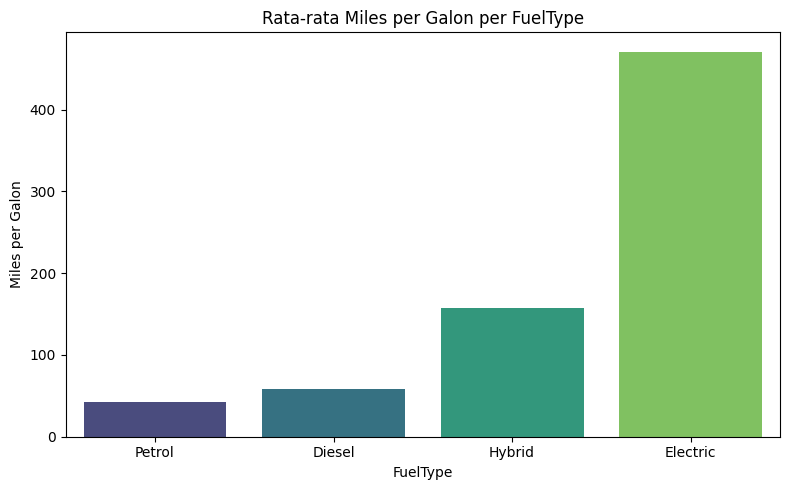

In [51]:
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_mpg.fuelType, y=avg_mpg.mpg, palette='viridis')
plt.title('Rata-rata Miles per Galon per FuelType')
plt.ylabel('Miles per Galon')
plt.xlabel('FuelType')
plt.tight_layout()
plt.show()

**Analisa sementara:**
- Rata-rata MpG mobil **listrik** sebesar **470.8**
- Rata-rata MpG mobil **diesel** sebesar **58.9**
- Rata-rata MpG mobil **bensin** sebesar **42.8**
- Rata-rata MpG mobil **hybrid** sebesar **134.5**
- Mobil dengan rata-rata MpG paling **besar** adalah **mobil listrik**.
- Mobil dengan rata-rata MpG paling **kecil** adalah **mobil hybrid**.
- Jika membandingkan rata-rata harga dengan rata-rata jarak tempuh, persebaran data rata-rata harga, **mobil bensin** memang akan lebih menguntungkan dan tidak seboros mobil diesel secara keseluruhan metrik, mengingat varian mobil listrik yang hanya tiga dan sudah pasti akan dipilih untuk dibeli tanpa memikirkan ketentuan MpG.

## **4. Kategori Harga Mobil Per Keluaran Tahun**
___

Model mobil BMW mana yang paling banyak tersedia dalam dataset berdasarkan kategori harga. Saya membagi tiap kategori dengan menggunakan nilai quartile 1, 2, dan 3 dengan tipe kategori murah, sedang, dan mahal. 

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Buat kategori harga berdasarkan kuartil
df['kategori_harga'] = pd.qcut(
    df['price'],
    q=3,
    labels=['Murah', 'Sedang', 'Mahal']
)

df['model_tahun'] = df['model'] + ' - ' + df['year'].astype(str)

df['model_tahun_fuel'] = (df['model_tahun'] + ' (' + df['fuelType'] + ')')

# Hitung jumlah per kategori_harga dan model_tahun
count_df = (
    df.groupby(['kategori_harga', 'model_tahun'])
    .size()
    .reset_index(name='jumlah')
)

# Ambil fuelType paling umum per kategori_harga dan model_tahun
fuel_mode_df = (
    df.groupby(['kategori_harga', 'model_tahun'])['fuelType']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    .reset_index(name='fuelType')
)

# Gabungkan jumlah dan fuelType
merged_df = pd.merge(count_df, fuel_mode_df, on=['kategori_harga', 'model_tahun'])

# Ambil top 5 per kategori_harga
top_models_per_category = (
    merged_df.groupby('kategori_harga', group_keys=False)
    .apply(lambda x: x.nlargest(5, 'jumlah'))
    .reset_index(drop=True)
)

# Tambahkan kolom gabungan model_tahun dan fuelType
top_models_per_category['model_tahun_fuel'] = (
    top_models_per_category['model_tahun'] + ' (' + top_models_per_category['fuelType'] + ')'
)
top_models_per_category

C:\Users\rafiu\AppData\Local\Temp\ipykernel_25272\1450179185.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kategori_harga'] = pd.qcut(
C:\Users\rafiu\AppData\Local\Temp\ipykernel_25272\1450179185.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model_tahun'] = df['model'] + ' - ' + df['year'].astype(str)
C:\Users\rafiu\AppData\Local\Temp\ipykernel_25272\1450179185.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,kategori_harga,model_tahun,jumlah,fuelType,model_tahun_fuel
0,Murah,1 Series - 2016,380,Diesel,1 Series - 2016 (Diesel)
1,Murah,1 Series - 2017,265,Diesel,1 Series - 2017 (Diesel)
2,Murah,3 Series - 2016,250,Diesel,3 Series - 2016 (Diesel)
3,Murah,3 Series - 2015,210,Diesel,3 Series - 2015 (Diesel)
4,Murah,1 Series - 2015,181,Diesel,1 Series - 2015 (Diesel)
5,Sedang,2 Series - 2019,411,Petrol,2 Series - 2019 (Petrol)
6,Sedang,1 Series - 2019,299,Petrol,1 Series - 2019 (Petrol)
7,Sedang,3 Series - 2017,224,Diesel,3 Series - 2017 (Diesel)
8,Sedang,3 Series - 2018,183,Diesel,3 Series - 2018 (Diesel)
9,Sedang,3 Series - 2019,161,Diesel,3 Series - 2019 (Diesel)


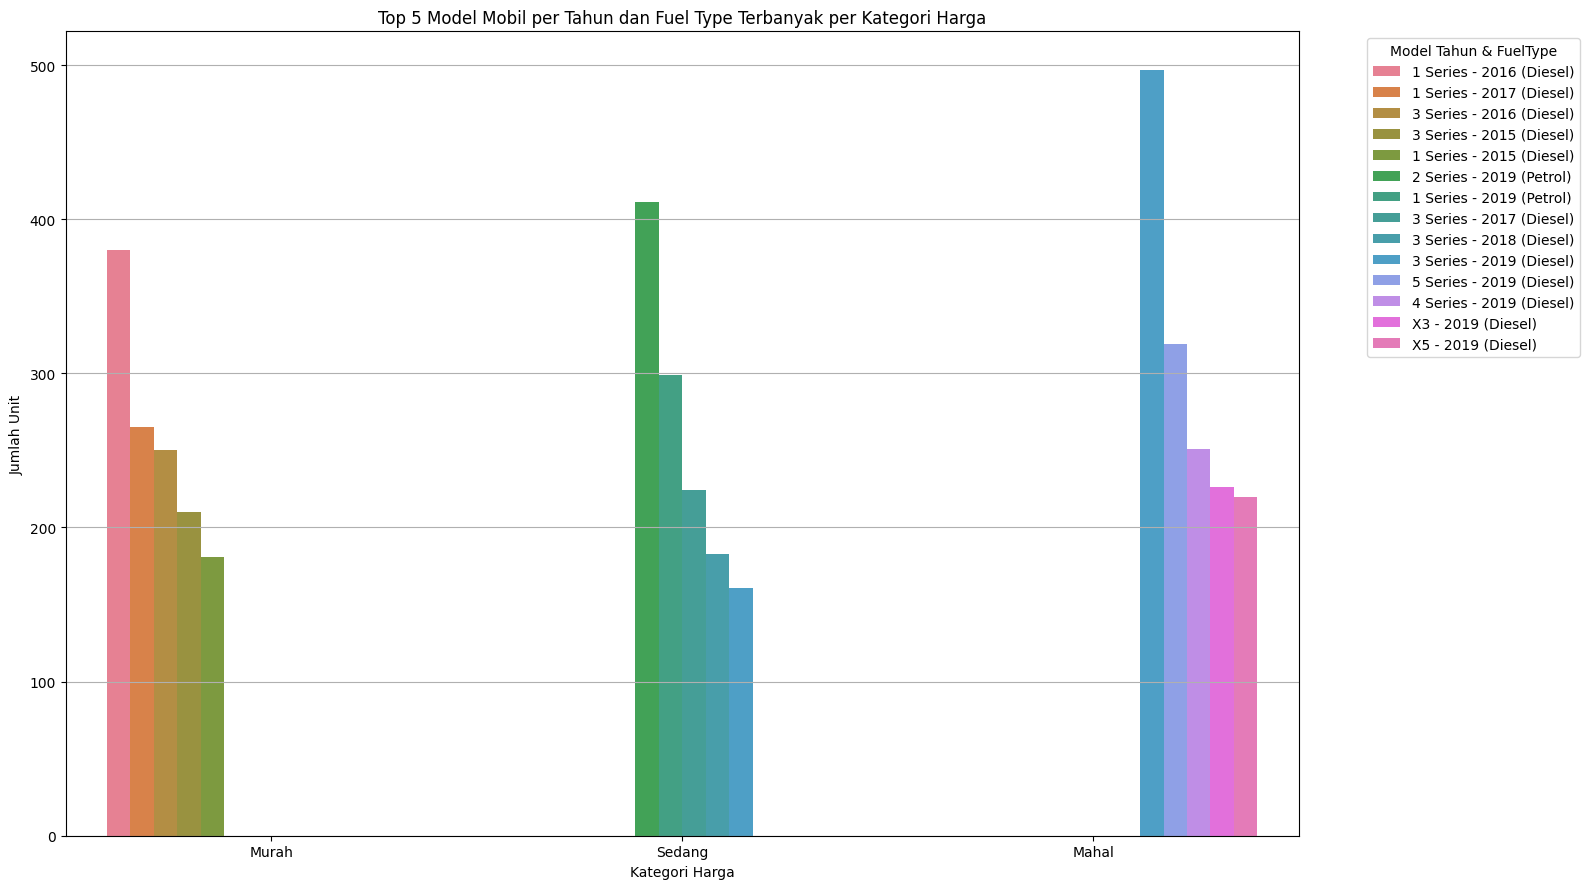

In [53]:
# Visualisasi
plt.figure(figsize=(16, 9))
sns.barplot(
    data=top_models_per_category,
    x='kategori_harga',
    y='jumlah',
    hue='model_tahun_fuel'
)

plt.title('Top 5 Model Mobil per Tahun dan Fuel Type Terbanyak per Kategori Harga')
plt.xlabel('Kategori Harga')
plt.ylabel('Jumlah Unit')
plt.legend(title='Model Tahun & FuelType', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

Kita bisa melihat bahwa persebaran top 5 data mobil BMW yang tersebar pada kategori murah, sedang, sampai mahal. Dengan ini saya bisa melakukan penyortiran data yang lebih baik untuk melakukan 

## **5. Berapa keuntungan minimum dan maksimum data top 5 model mobil pada setiap tipe bahan bakar?**
___

Menggunakan data yang diperoleh pada setiap kategori harga sebelumnya, saya melakukan perhitungan keuntungan yang dapat diperoleh pada setiap jenis mobil per tipe bahan bakar.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Misal: df = pd.read_csv("mobil.csv")

# Ambil top 5 kombinasi model-tahun per fuelType berdasarkan rata-rata harga
top_models_all = {}
for fuel in df['fuelType'].unique():
    df_fuel = df[df['fuelType'] == fuel]
    top_models = (
        df_fuel.groupby(['model', 'year'])['price']
        .mean()
        .sort_values(ascending=False)
        .head(5)
        .index
    )
    top_models_all[fuel] = top_models

# Simpan hasil analisis
summary = []

for fuel, model_years in top_models_all.items():
    for model, year in model_years:
        data = df[(df['fuelType'] == fuel) & (df['model'] == model) & (df['year'] == year)]
        if len(data) <3: continue  # skip jika terlalu sedikit

        prices = data['price']
        mean_price = prices.mean()
        min_price = prices.min()
        max_price = prices.max()
        std_price = prices.std()
        n = len(prices)

        # Hitung 95% confidence interval
        ci_low, ci_high = stats.t.interval(
            confidence=0.95,
            df=n-1,
            loc=mean_price,
            scale=stats.sem(prices)
        )

        summary.append({
            'fuelType': fuel,
            'model': f"{model} - {year} - {fuel}",
            'mean_price': mean_price,
            'min_price': min_price,
            'max_price': max_price,
            'range': max_price - min_price,
            'ci_low': ci_low,
            'ci_high': ci_high,
            'count': n
        })

df_summary = pd.DataFrame(summary)

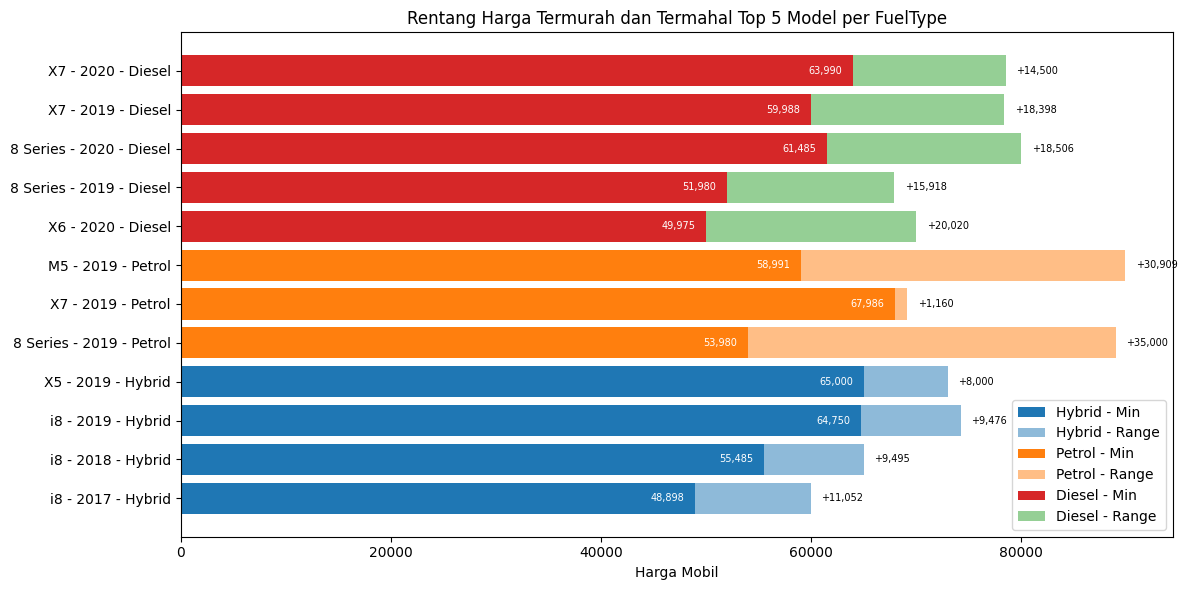

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Tentukan fuelType yang ingin ditampilkan
allowed_fuels = ['Electric', 'Hybrid', 'Petrol', 'Diesel']

# Filter df_summary hanya untuk fuelType yang diizinkan
df_summary_filtered = df_summary[df_summary['fuelType'].isin(allowed_fuels)]
df_summary_filtered = df_summary_filtered.sort_values(by='mean_price')

plt.figure(figsize=(12, 6))

colors = {
    'Electric': '#2ca02c',
    'Hybrid': '#1f77b4',
    'Petrol': '#ff7f0e',
    'Diesel': '#d62728'
}

y_offset = 0
yticks = []
ytick_labels = []
legend_labels = set()

for fuel in allowed_fuels:
    subset = df_summary_filtered[df_summary_filtered['fuelType'] == fuel]
    if subset.empty:
        continue

    y_pos = np.arange(len(subset)) + y_offset

    bars_min = plt.barh(
        y_pos,
        subset['min_price'],
        label=f"{fuel} - Min" if f"{fuel} - Min" not in legend_labels else "",
        color=colors.get(fuel, 'gray')
    )

    
    bars_range = plt.barh(
        y_pos,
        subset['range'],
        left=subset['min_price'],
        label=f"{fuel} - Range" if f"{fuel} - Range" not in legend_labels else "",
        alpha=0.5
    )

    for bar in bars_min:
        plt.text(bar.get_width() - 1000, bar.get_y() + bar.get_height() / 2,
                 f"{int(bar.get_width()):,}", va='center', ha='right', fontsize=7, color='white')

    for bar in bars_range:
        plt.text(bar.get_x() + bar.get_width() + 1000, bar.get_y() + bar.get_height() / 2,
                 f"+{int(bar.get_width()):,}", va='center', ha='left', fontsize=7, color='black')

    yticks.extend(y_pos)
    ytick_labels.extend(subset['model'])
    y_offset += len(subset)
    legend_labels.update({f"{fuel} - Min", f"{fuel} - Max", f"{fuel} - Range"})

plt.yticks(ticks=yticks, labels=ytick_labels)
plt.xlabel('Harga Mobil')
plt.title('Rentang Harga Termurah dan Termahal Top 5 Model per FuelType')
plt.legend()
plt.tight_layout()
plt.show()  

In [56]:
# Menyimpan file excel untuk dilakukan visualisasi pada Tableau
df.to_excel('df12346.xlsx', index=False)
df_summary.to_excel('dfno5.xlsx', index=False)

## **6. Hubungan antara harga per kategori bahan bakar dengan jarak tempuh per kategori bahan bakar?**
___
Berdasarkan hasil data yang diperoleh dari perhitungan rata-rata harga dan rata-rata mileage pada per tipe bahan bakar mobil, saya mengindikasikan pengaruh antara harga dengan mobil jarak tempuh. Pada tahap ini saya melakukan uji semi-inferensial dengan melihat korelasi antar kedua tabel tersebut dan melakukan uji hipotesis terhadap kedua dataset.

Sebelum melakukan perhitungan korelasi, saya menentukan terlebih dahulu apakah data ini lebih cocok untuk menggunakan rumus korelasi tertentu. Maka saya melakukan perhitungan central tendency pada dataframe ini.

In [57]:
# Hitung statistik deskriptif untuk 'price' per fuelType
print("\nStatistik Deskriptif untuk kolom Price per fuelType:")
for fuel, group in df.groupby('fuelType')['price']:
    print(f"\nFuel Type: {fuel}")
    print(f"Rata-rata       : £{group.mean():,.2f}")
    print(f"Median          : £{group.median():,.2f}")
    print(f"Modus           : £{group.mode().iloc[0]:,.2f}")
    print(f"Standar Deviasi : £{group.std():,.2f}")
    print(f"Skewness        : {group.skew():.2f}")
    print(f"Kurtosis        : {group.kurtosis():.2f}")

# Hitung statistik deskriptif untuk 'mileage' per fuelType
print("\nStatistik Deskriptif untuk kolom Mileage per fuelType:")
for fuel, group in df.groupby('fuelType')['mileage']:
    print(f"\nFuel Type: {fuel}")
    print(f"Rata-rata       : {group.mean():,.2f} miles")
    print(f"Median          : {group.median():,.2f} miles")
    print(f"Modus           : {group.mode().iloc[0]:,.2f} miles")
    print(f"Standar Deviasi : {group.std():,.2f}")
    print(f"Skewness        : {group.skew():.2f}")
    print(f"Kurtosis        : {group.kurtosis():.2f}")


Statistik Deskriptif untuk kolom Price per fuelType:

Fuel Type: Diesel
Rata-rata       : £21,779.26
Median          : £19,000.00
Modus           : £14,000.00
Standar Deviasi : £11,194.08
Skewness        : 1.62
Kurtosis        : 4.12

Fuel Type: Electric
Rata-rata       : £18,466.00
Median          : £18,999.00
Modus           : £18,999.00
Standar Deviasi : £923.18
Skewness        : -1.73
Kurtosis        : nan

Fuel Type: Hybrid
Rata-rata       : £27,169.71
Median          : £23,815.50
Modus           : £21,450.00
Standar Deviasi : £12,642.38
Skewness        : 1.65
Kurtosis        : 3.00

Fuel Type: Petrol
Rata-rata       : £24,360.27
Median          : £21,999.00
Modus           : £20,980.00
Standar Deviasi : £11,527.27
Skewness        : 1.56
Kurtosis        : 4.10

Statistik Deskriptif untuk kolom Mileage per fuelType:

Fuel Type: Diesel
Rata-rata       : 29,852.80 miles
Median          : 24,600.00 miles
Modus           : 123.00 miles
Standar Deviasi : 26,386.90
Skewness        : 1.1

Berdasarkan persebearan data rata-rata diatas, saya menggunakan korelasi pearson dikarenakan persebaran data yang cenderung tidak terlalu banyak outliers dengan asumsi distribusi normal. Juga dengan tipe data kontinu dan bukan perangkingan, maka saya menggunakan rumus pearson.

In [58]:
from scipy import stats

# Simpan hasil korelasi per fuelType
correlation_results = []

for fuel, group in df.groupby('fuelType'):
    if group['price'].count() >= 2 and group['mileage'].count() >= 2:
        corr_r, pval_p = stats.pearsonr(group['price'], group['mileage'])
        correlation_results.append({
            'fuelType': fuel,
            'pearson_r': corr_r,
            'p_value': pval_p
        })

# Ubah ke DataFrame untuk ditampilkan rapi
df_corr = pd.DataFrame(correlation_results)
print(df_corr)


   fuelType  pearson_r        p_value
0    Diesel  -0.639716   0.000000e+00
1  Electric  -0.847906   3.557264e-01
2    Hybrid  -0.534660   1.968361e-23
3    Petrol  -0.532453  1.528664e-249


Berdasarkan perhitungan korelasi yang didapatkan saya dapat menyimpulkan beberapa hal:

1. Diesel : Memiliki korelasi negatif kuat dengan hubungan yang signifikan antara harga dengan jarak tempuh. 
2. EV : Memiliki korelasi negatif yang kuat namun tidak signifikan. Hal ini bisa dipicu karena data yang sedikit (3 data).
3. Hybrid : Memiliki korelasi secara negatif dengan tingkat signifikansi kuat. 
4. Bensin : Memiliki korelasi secara negatif dengan tingkat signifikansi kuat.

Mobil Diesel sangat terpengaruh terhadap jarak tempuh mobil. Disisi lain mobil hybrid dan bensin juga menurun namun tidak separah mobil diesel. Selain itu mobil EV tidak memiliki cukup data, maka korelasi belum bisa dibuktikan secara signifikan.

## **CONCLUSION**
___

Terdapat beberapa kesimpulan yang saya dapatkan:

1. Harga mobil dengan bahan bakar diesel lebih menguntungkan secara harga, namun tidak secara jarak tempuh dan tingkat keborosan. Secara overall harga mobil dengan bahan bakar bensin lebih baik secara keseluruhan untuk kategori mobil tipe NON-EV.
2. Berdasarkan hasil nilai confidence interval, top 5 model mobil pada tiap bahan bakar. Nilai return paling bear untuk mobil diesel ada pada series M5 Petrol keluaran tahun 2019 dan 8 Series 2019 Petrol. Untuk Mobil Diesel ada pada seires X6 keluaran tahun 2020. Untuk hybrid dipilih mobil i8 keluaran tahun 2017 dan i8 2019 . Untuk mobil EV i3 keluaran tahun 2016.
3. Pemilihan unit mobil diatas berdasarkan observasi atas hasil korelasi hubungan harga dan mileage mobil per tipe bensin, juga dengan insight-insight dari harga mobil, mileage, serta cc tiap mobil dari kategori mobil murah sampai mahal. Selebihnya, hasil analisa akan diberikan kepada perusahaan untuk selanjutnya di jadikan pertimbangan lanjutan. 